<a href="https://colab.research.google.com/github/DavidJimenez10/Introduccion_Inteligencia_Artificial/blob/main/MIN_MAX_Cuatro_Raya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Algoritmo Poda Alfa Beta**

El algoritmo poda alfa beta es una tecnica de busqueda que reduce el numero de nodos evaluados en un arborl de juego por el algoritmo MiniMax.
Para su implementacion se partio del algoritmo MiniMax visto en clase, el cual era un algoritmo recursivo el cual tiene dos metodos, el alfaBeta es el que hace el primer llamado a la funcion y genera los hijos del nodo raiz, el alfaBetaR es el que se llama de forma recursiva en el que se va comparando si alfa es mayor o igual a beta, si esto ocurre se podarian las ramas faltantes del nodo padre.

In [ ]:
import pydot
from IPython.display import Image, display
import queue
import numpy as np

In [ ]:
class Node ():
  def __init__(self, state,value,operators,operator=None, parent=None,objective=None):
    self.state= state
    self.value = value
    self.children = []
    self.parent=parent
    self.operator=operator
    self.objective=objective
    self.level=0
    self.operators=operators
    self.v=0

  def add_child(self, value, state, operator):
    node=type(self)(value=value, state=state, operator=operator,parent=self,operators=self.operators)
    node.level=node.parent.level+1
    self.children.append(node)
    return node
  
  def add_node_child(self, node):
    node.level=node.parent.level+1
    self.children.append(node)    
    return node

  #Devuelve todos los estados según los operadores aplicados
  def getchildrens(self):
    return [
        self.getState(i) 
          if not self.repeatStatePath(self.getState(i)) 
            else None for i, op in enumerate(self.operators)]
    
  def getState(self, index):
    pass
  
  def __eq__(self, other):
    return self.state == other.state
 
  def __lt__(self, other):
    return self.f() < other.f()
   
  
  def repeatStatePath(self, state):
      n=self
      while n is not None and n.state!=state:
          n=n.parent
      return n is not None
    
  def pathObjective(self):
      n=self
      result=[]
      while n is not None:
          result.append(n)
          n=n.parent
      return result
  
  def heuristic(self):
    return 0
  
  def cost(self):
    return 1
  
  def f(self): 
    return self.cost()+self.heuristic()

  ### Crear método para criterio objetivo
  ### Por defecto vamos a poner que sea igual al estado objetivo, para cada caso se puede sobreescribir la función
  def isObjective(self):
    return (self.state==self.objetive.state)


In [ ]:
class Tree ():
  def __init__(self, root ,operators):
    self.root=root
    self.operators=operators

  def printPath(self,n):
    stack=n.pathObjective()
    path=stack.copy()
    while len(stack)!=0:
        node=stack.pop()
        if node.operator is not None:
            print(f'operador:  {self.operators[node.operator]} \t estado: {node.state}')
        else:
            print(f' {node.state}')
    return path

  def reinitRoot(self):
    self.root.operator=None
    self.root.parent=None
    self.root.objective=None
    self.root.children = []
    self.root.level=0

  ## Generar los hijos del nodo raiz  
  def alfaBeta(self, depth):
    self.root.v=self.alfaBetaR(self.root, depth, True)
    ## Comparar los hijos de root
    values=[c.v for c in self.root.children]
    #print(values)
    maxvalue=max(values)
    index=values.index(maxvalue)
    return self.root.children[index]

      #funcion recursiva
  def alfaBetaR(self, node, depth, maxPlayer):
    #comprobando condicion de parada
    if depth==0 or node.isObjective():
      node.v=node.heuristic()
      return node.heuristic()

    ## Generar los hijos del nodo
    children=node.getchildrens()
    
    ## Según el jugador que sea en el árbol
    if maxPlayer:
      #Variable auxiliar al final del algoritmo se da el valor de value
      value=float('-inf')
      for i,child in enumerate(children):
        if child is not None:
          # Genero y añado al hijo valido. El hijo hereda los valores de alfa y beta del padre.
          # Ademas, se agrego al hijo el ultimo movimiento. 
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child[0],operator=i,parent=node, operators=node.operators,player=False,alpha = node.alpha,beta= node.beta, last_move = child[1])
          newChild=node.add_node_child(newChild)
          value=max(value,self.alfaBetaR(newChild,depth-1,False))
          
          # Por ser el nivel en el que juega max, el valor de alfa toma el valor  de value.
          node.alpha = value 

          # Se compara si el valor de alfa es mayor o igual que el de beta, si esto ocurre deja de recorrer los hijos de el nodo actual (Realiza la poda).
          if node.alpha >= node.beta:
            break

    else:
      #Se hace lo mismo pero utilizando el valor minimo
      value=float('inf')
      for i,child in enumerate(children):
        if child is not None:
          # Genero y añado al hijo valido. El hijo hereda los valores de alfa y beta del padre.
          # Ademas, se agrego al hijo el ultimo movimiento. 
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child[0],operator=i,parent=node, operators=node.operators,player=True,alpha= node.alpha,beta= node.beta,last_move = child[1])
          newChild=node.add_node_child(newChild)
          value=min(value,self.alfaBetaR(newChild,depth-1,True))

          # Por ser el nivel en el que juega min, el valor de beta toma el valor  de value.
          node.beta = value

          # Se compara si el valor de alfa es mayor o igual que el de beta, si esto ocurre deja de recorrer los hijos de el nodo actual (Realiza la poda).
          if node.alpha >= node.beta:
            break

    node.v=value
    return value

  ## Método para dibujar el árbol        
  def draw(self,path):
    graph = pydot.Dot(graph_type='graph')
    nodeGraph=pydot.Node(str(self.root.state)+"-"+str(0),
                          label=str(self.root)+r"\n"+r"\n"+'Value_Nodo='+str(self.root.v)+r"\n"+'Alpha='+str(self.root.alpha)+r"\n"+'Beta='+str(self.root.beta),
                          shape ="circle", 
                          style="filled", fillcolor="red",fontsize=25)
    graph.add_node(nodeGraph)
    path.pop()
    return self.drawTreeRec(self.root,nodeGraph,graph,0,path.pop(),path)
  
  ## Método recursivo para dibujar el árbol  
  def drawTreeRec(self,r,rootGraph,graph,i,topPath,path):
    if r is not None:
      children=r.children
      for j,child in enumerate(children):
        i=i+1
        color="white"
        if topPath.value==child.value:
          if len(path)>0:topPath=path.pop()
          color='red'

        # Se agrego la heuristica, el alfa y beta en cada nodo cuando es desplegado en el arbol.
        c=pydot.Node(child.value,label=str(child)+r"\n"+r"\n"+"Heuristica="+str(child.heuristic())+r"\n"+'Value_Nodo='+str(child.v)+r"\n"+'Alpha='+str(child.alpha)+r"\n"+'Beta='+str(child.beta), 
                      shape ="circle", style="filled",fontsize=25, 
                      fillcolor=color)
        graph.add_node(c)
        graph.add_edge(pydot.Edge(rootGraph, c, 
                                  label=str(child.operator)+'('+str(child.cost())+')'))
        graph=self.drawTreeRec(child,c,graph,i,topPath,path)  # recursive call
      return graph
    else:
      return graph  

#**4 en Linea**

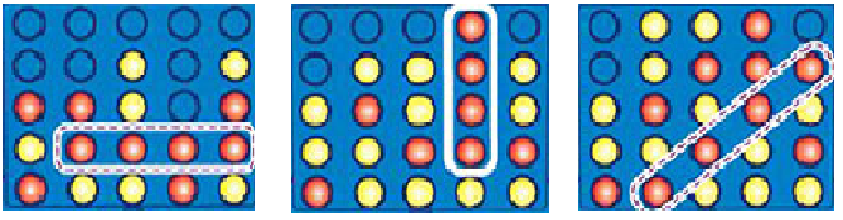

##Posición inicial y objetivo del juego
El 4 en Línea pertenece a la familia de juegos populares ya que sus sencillas reglas se pueden aprender rápidamente ofreciendo un gran entretenimiento durante un largo tiempo. El objetivo de este juego consiste en colocar cuatro fichas en una fila contínua vertical, horizontal o diagonalmente. Se juega sobre un tablero de 8x8 casillas que al empezar está vacío.

##Cómo colocar las fichas

Ambos jugadores sitúan sus fichas (una por movimiento) en el tablero. La regla para colocarlas consiste en que la estas siempre "caen hasta abajo". Es decir una ficha puede ser colocada bien en la parte inferior de una columna o bien sobre otra de alguna otra columna. La siguiente imagen muestra un ejemplo de la posición de una partida en curso donde las cruces verdes señalan las casillas donde el jugador puede colocar una nueva ficha.

##Cómo finalizar el juego

La partida termina si una de las siguientes condiciones se cumple:
* Uno de los jugadores coloca cuatro o más fichas en una línea contínua vertical, horizontal o diagonalmente. Este jugador gana la partida.
* Todas las casillas del tablero están ocupadas y ningún jugador cumple la condición anterior para ganar. En este caso la partida finaliza en empate.

# **Clase NodeConnectFour**
Se implemento la clase NodeConnectFour que hereda de la clase nodo, recibe como parametros last_move, alfa, beta y player. Se implementaron los siguientes metodos:

* **getState:** En este obtienen los posible estados al aplicar todos los operadores del juego. Ademas, en este metodo se obtiene la ultima posicion que genera el operador en el tablero (last_move).

* **in_bounds:** Calcula si el movimiento generado por un operador es valido.

* **isObjective:** Este verifica si el estado generado por un operador es el objetivo. Para validar si este estado es el objetivo (si existe una linea de cuatro), se validan todas las direcciones posibles.

* **heuristic:** En este metodo se calcula la heuristica de cada movimiento, esta se basa principalmente en el analisis del estado que genera el ultimo movimiento. En el cual se analizan cuales son las fichas aliadas con las que se podria jugar y las posibles jugadas que podria realizar la ficha contraria.  

In [ ]:
class NodeConnectFour(Node):
  ## Vamos a añadir el jugador, pues en dependencia del jugador se hace una cosa u otra.

  def __init__(self,last_move =None, alpha=None,beta=None,player=True,**kwargs):
    
    super(NodeConnectFour, self).__init__(**kwargs)
    self.player=player

    if last_move is None:
      self.last_move = None
    else:
      self.last_move = last_move

    if alpha is None:
      self.alpha = float('-inf')
    else:
      self.alpha = alpha
    
    if beta is None:
      self.beta = float('inf')
    else:
      self.beta = beta
    
    if player:
      self.v=float('-inf')
    else:
      self.v=float('inf')
  
  def getState(self, index):
    state=self.state
    nextState=None
    column=self.operators[index]
    for i in range(len(state)-1, -1, -1):
      #print('i',i,'col',column)
      if self.state[i][column] == ' ':
        nextState= [f.copy() for f in state]
        #print('nivel',self.level)
        nextState[i][column] = 'X' if self.level % 2 else 'O'
        last_move = [i, column]
        #print('Estado:',nextState)
        #print('Movimiento:',last_move)
        return (nextState,last_move) if state!=nextState else None

    return None

  #Costo acumulativo(valor 1 en cada nivel)
  def cost(self):
    return self.level

  def in_bounds(self, r, c):
        return (r >= 0 and r < len(self.state) and c >= 0 and c < len(self.state[0]))
  
  ##Ver si el nodo es un nodo objetivo para O o para X, o hay empate
  def isObjective(self):
    #print(self.last_move)
    if self.last_move is not None:
      last_row = self.last_move[0]
      last_col = self.last_move[1]
      last_letter = self.state[last_row][last_col]
      #print(f"last_move {self.last_move}")

      # [r, c] direccion, cuenta coincidencia de fichas, bool
      directions = [[[-1, 0], 0, True], 
                    [[1, 0], 0, True], 
                    [[0, -1], 0, True],
                    [[0, 1], 0, True],
                    [[-1, -1], 0, True],
                    [[1, 1], 0, True],
                    [[-1, 1], 0, True],
                    [[1, -1], 0, True]]
      
      # Busqueda de fichas coincidentes
      for a in range(4):
          for d in directions:
              r = last_row + (d[0][0] * (a+1))
              c = last_col + (d[0][1] * (a+1))

              #print(f" r,c: {r} ,{c}")

              if d[2] and self.in_bounds(r, c) and self.state[r][c] == last_letter :
                  d[1] += 1
              else:
                  # Detiene la busqueda en esta dirección
                  d[2] = False

      # Verifica los pares de direcciones posibles para el 4 en linea
      for i in range(0, 7, 2):  
        if (directions[i][1] + directions[i+1][1] >= 3):
            #print(f"{last_letter} is the winner!")
            return True 
    return False

  ## Si es nodo objetivo, si X retornamos 1, si O -1 y si no 0
  def heuristic(self):
    last_row = self.last_move[0]
    last_col = self.last_move[1]
    last_letter = 'X' if self.level % 2 else 'O'
    last_letter_parent = 'X' if self.parent.level % 2 else 'O'

    # [r, c] direccion, cuenta coincidencia de fichas, bool
    directions = [[[-1, 0], 0, True, 0, True], 
                  [[1, 0], 0, True, 0, True], 
                  [[0, -1], 0, True, 0, True],
                  [[0, 1], 0, True, 0, True],
                  [[-1, -1], 0, True, 0, True],
                  [[1, 1], 0, True, 0, True],
                  [[-1, 1], 0, True, 0, True],
                  [[1, -1], 0, True, 0, True]]
    
    cont = 0
    for a in range(3):
        for d in directions:
            r = last_row + (d[0][0] * (a+1))
            c = last_col + (d[0][1] * (a+1))
            # Contar las piezas mías con las que puedo jugar
            if d[2] and self.in_bounds(r, c):
              if self.state[r][c] == last_letter:
                d[1] += 1
              elif self.state[r][c] == ' ':
                cont+= 1
              elif self.state[r][c] == last_letter_parent or cont > 2:
                cont = 0
                d[2] = False
             
            # Contar las piezas del rival que bloqueo
            if d[4] and self.in_bounds(r, c) and self.state[r][c] == last_letter_parent:
                d[3] += 1
            else:
                # Detiene la busqueda en esta dirección
                d[4] = False

    # Verifica los pares de direcciones posibles para el 4 en linea
    h = 1
    for i in range(0, 7, 2):

      if (directions[i][1] + directions[i+1][1]) > 2:
        h += (directions[i][1] + directions[i+1][1])*1.5
      else:
        h += directions[i][1] + directions[i+1][1]

      if (directions[i][3] + directions[i+1][3]) < 2:
        pass
      else:
        h += (directions[i][3] + directions[i+1][3])*1.5

    if self.player:
      return 1/h
    else:
      return h 

  def __str__(self):
    aux_str = ''
    for fila in self.state:
      aux_str = aux_str + str(fila) + '\n'
    return aux_str



# **Heuristica**


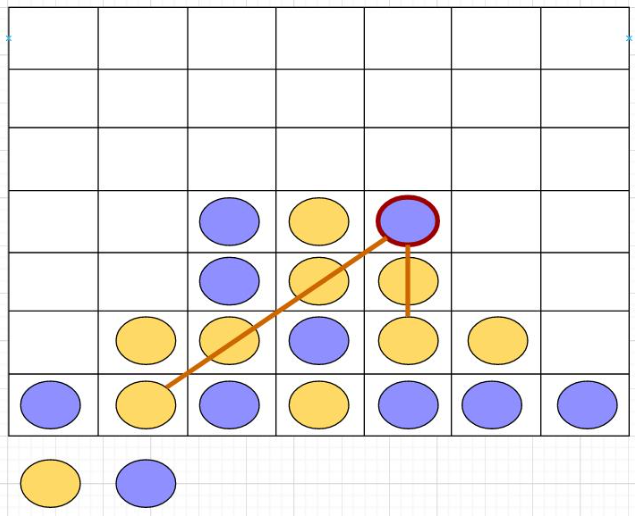

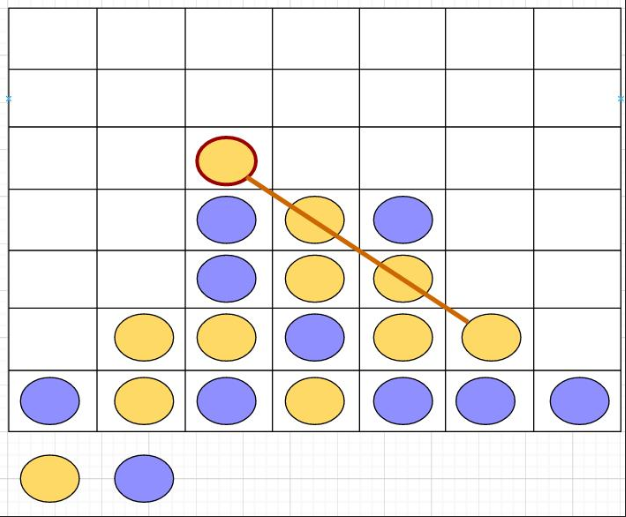

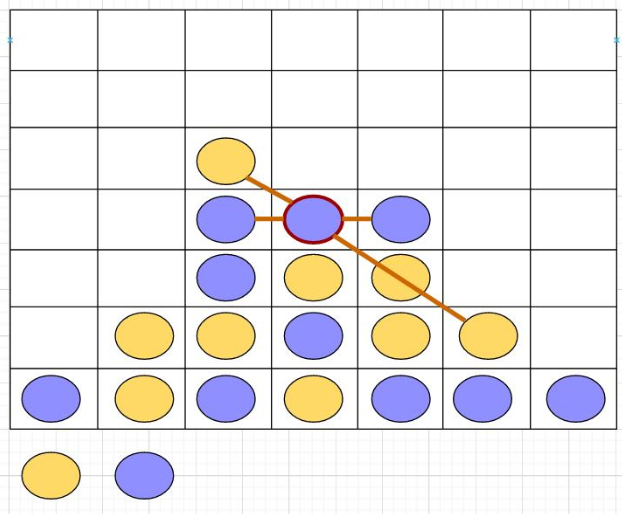

In [ ]:
# Hard-coded board size
BOARD_COLS = 7
BOARD_ROWS = 6

initState=[[' ', ' ', ' ', ' ', ' ', ' ', ' '], 
           [' ', ' ', 'X', ' ', ' ', ' ', ' '], 
           [' ', ' ', 'O', ' ', 'O', ' ', ' '],
           [' ', ' ', 'O', 'X', 'X', ' ', ' '],
           [' ', 'X', 'X', 'O', 'X', 'X', ' '], 
           ['O', 'X', 'O', 'X', 'O', 'O', 'O']]

operators=[i for i in range(BOARD_COLS)]
print(initState)
print(operators)

[[' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', 'X', ' ', ' ', ' ', ' '], [' ', ' ', 'O', ' ', 'O', ' ', ' '], [' ', ' ', 'O', 'X', 'X', ' ', ' '], [' ', 'X', 'X', 'O', 'X', 'X', ' '], ['O', 'X', 'O', 'X', 'O', 'O', 'O']]
[0, 1, 2, 3, 4, 5, 6]


In [ ]:
nodeInit=NodeConnectFour(player =True,value="inicio",state=initState, operators= operators)
treeConnectFour= Tree(nodeInit,operators)

In [ ]:
objective=treeConnectFour.alfaBeta(3)
path=treeConnectFour.printPath(objective)
graph=treeConnectFour.draw(path.copy())
tree_image = Image(graph.create_png(), width=4000, height=800)
display(tree_image)

 [[' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', 'X', ' ', ' ', ' ', ' '], [' ', ' ', 'O', ' ', 'O', ' ', ' '], [' ', ' ', 'O', 'X', 'X', ' ', ' '], [' ', 'X', 'X', 'O', 'X', 'X', ' '], ['O', 'X', 'O', 'X', 'O', 'O', 'O']]
operador:  0 	 estado: [[' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', 'X', ' ', ' ', ' ', ' '], [' ', ' ', 'O', ' ', 'O', ' ', ' '], [' ', ' ', 'O', 'X', 'X', ' ', ' '], ['O', 'X', 'X', 'O', 'X', 'X', ' '], ['O', 'X', 'O', 'X', 'O', 'O', 'O']]


#**Implementacion de la clase del juego**

Se implemento la clase Board que permite jugar 4 en linea, esta tiene los siguientes metodos:

* **print_board:** Este metode se encarga de imprimir el tablero en consola.
* **which_turn:** Este metodo determina el tipo de ficha que juega.
* **in_bounds:** Calcula si el movimiento es valido.
* **turn:** Recibe la columna y devuelve el estado del tablero.
* **check_winner:** A partir del estado del tablero, valida las direcciones de del ultimo moviemto y determina si hay un ganador.

Se definio una funcion que ejecuta esta clase en un while y termina si hay un ganador o el tablero esta completamente lleno.

In [ ]:
# Tamaño del tablero predeterminado
BOARD_COLS = 7
BOARD_ROWS = 6

# Se genera la clase tablero
class Board():
    def __init__(self):
        self.board = [[' ' for _ in range(BOARD_COLS)] for _ in range(BOARD_ROWS)]
        print(self.board)
        self.turns = 0
        self.last_move = [-1, -1] # [r, c]

    def print_board(self):
        print("\n")
        # Numeración de columnas espaciadas
        for r in range(BOARD_COLS):
            print(f"  ({r+1}) ", end="")
        print("\n")

        # Imprime cada una de las casillas 
        for r in range(BOARD_ROWS):
            print('|', end="")
            for c in range(BOARD_COLS):
                print(f"  {self.board[r][c]}  |", end="")
            print("\n")

        print(f"{'-' * 42}\n")

    def which_turn(self):
        players = ['X', 'O']
        return players[self.turns % 2]
    
    def in_bounds(self, r, c):
        return (r >= 0 and r < BOARD_ROWS and c >= 0 and c < BOARD_COLS)

    def turn(self, column):
        # Busca espacios vacíos en la columna ingresada
        for i in range(BOARD_ROWS-1, -1, -1):
            if self.board[i][column] == ' ':
                self.board[i][column] = self.which_turn()
                self.last_move = [i, column]

                self.turns += 1
                return True

        return False

    def check_winner(self):
        last_row = self.last_move[0]
        last_col = self.last_move[1]
        last_letter = self.board[last_row][last_col]

        # [r, c] direccion, cuenta coincidencia de fichas, bool
        directions = [[[-1, 0], 0, True], 
                      [[1, 0], 0, True], 
                      [[0, -1], 0, True],
                      [[0, 1], 0, True],
                      [[-1, -1], 0, True],
                      [[1, 1], 0, True],
                      [[-1, 1], 0, True],
                      [[1, -1], 0, True]]
        
        # Busqueda de fichas coincidentes
        for a in range(4):
            for d in directions:
                r = last_row + (d[0][0] * (a+1))
                c = last_col + (d[0][1] * (a+1))

                if d[2] and self.in_bounds(r, c) and self.board[r][c] == last_letter:
                    d[1] += 1
                else:
                    # Detiene la busqueda en esa dirección
                    d[2] = False

        # Verifica los pares de direcciones posibles para el 4 en linea
        for i in range(0, 7, 2):  
          if (directions[i][1] + directions[i+1][1] >= 3):
              self.print_board()
              print(f"{last_letter} Es el ganador!")
              return last_letter   

        # Si no encuentra ganador retorna False
        return False

def play():
    # Inicializa el tablero de juego
    game = Board()

    # Tablero con tamaño predeterminado
    BOARD_COLS = 7
    BOARD_ROWS = 6

    board = game.board

    operators=[i for i in range(BOARD_COLS)]
    print(initState)
    print(operators)

    game_over = False
    while not game_over:
        game.print_board()

        # Pregunta al usuario la columna que desea jugar
        valid_move = False
        while not valid_move:
          if game.turns % 2:
            nodeInit=NodeConnectFour(player=True,value="inicio",state=board, operators= operators)
            treeConnectFour= Tree(nodeInit,operators)
            objective=treeConnectFour.alfaBeta(5)
            path=treeConnectFour.printPath(objective)
            graph=treeConnectFour.draw(path.copy())
            graph.write_png('arbol.png')

            user_move = path[0].operator + 1
          else:
            user_move = input(f"Turno de {game.which_turn()} - Escoja una columna (1-{BOARD_COLS}): ")
            

          try:
              valid_move = game.turn(int(user_move)-1)
          except:
              print(f"Selecione un numero entre 1 y {BOARD_COLS}")

        # Termina el juego si encuentra un ganador
        game_over = game.check_winner()
        
        # Termina el juego si ya no hay casillas disponibles ni un ganador 
        if not any(' ' in x for x in game.board):
            print("El juego está empatado..")
            return

if __name__ == '__main__':
    play()

[[' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', 'X', ' ', ' ', ' ', ' '], [' ', ' ', 'O', ' ', 'O', ' ', ' '], [' ', ' ', 'O', 'X', 'X', ' ', ' '], [' ', 'X', 'X', 'O', 'X', 'X', ' '], ['O', 'X', 'O', 'X', 'O', 'O', 'O']]
[0, 1, 2, 3, 4, 5, 6]


  (1)   (2)   (3)   (4)   (5)   (6)   (7) 

|     |     |     |     |     |     |     |

|     |     |     |     |     |     |     |

|     |     |     |     |     |     |     |

|     |     |     |     |     |     |     |

|     |     |     |     |     |     |     |

|     |     |     |     |     |     |     |

------------------------------------------



  (1)   (2)   (3)   (4)   (5)   (6)   (7) 

|     |     |     |     |     |     |     |

|     |     |     |     |     |     |     |

|     |     |     |     |     |     